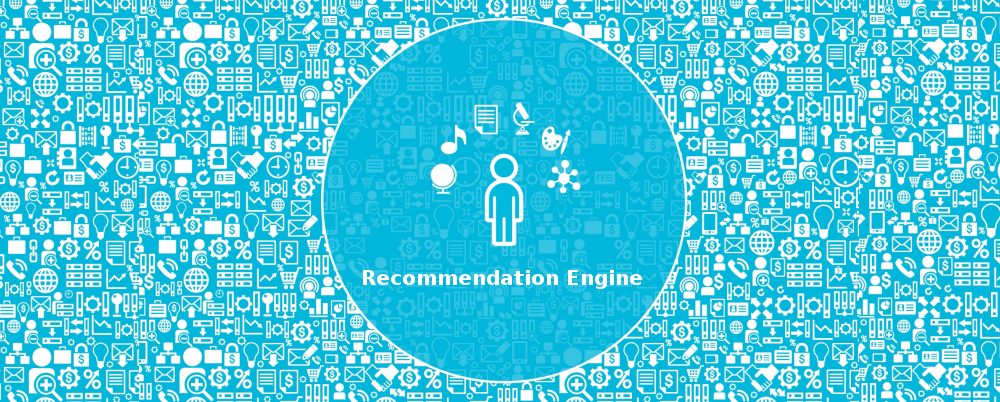

# USE CASE

<b>DESCRIPTION</b>

The dataset provided contains movie reviews given by Amazon customers. Reviews were given between May 1996 and July 2014.

<b>Data Dictionary</b><br>
UserID – 4848 customers who provided a rating for each movie<br>
Movie 1 to Movie 206 – 206 movies for which ratings are provided by 4848 distinct users

<b>Data Considerations</b><br>
- All the users have not watched all the movies and therefore, all movies are not rated. These missing values are represented by NA.<br>
- Ratings are on a scale of -1 to 10 where -1 is the least rating and 10 is the best.

<b>Analysis Task</b><br>

<b>- Exploratory Data Analysis:</b>

&nbsp;&nbsp;1. Which movies have maximum views/ratings?<br>
&nbsp;&nbsp;2. What is the average rating for each movie? Define the top 5 movies with the maximum ratings.<br>
&nbsp;&nbsp;3. Define the top 5 movies with the least audience.

<b>- Recommendation Model: Some of the movies hadn’t been watched and therefore, are not rated by the users. Netflix would like to take this as an opportunity and build a machine learning recommendation algorithm which provides the ratings for each of the users.</b>

&nbsp;&nbsp;1. Divide the data into training and test data<br>
&nbsp;&nbsp;2. Build a recommendation model on training data<br>
&nbsp;&nbsp;3. Make predictions on the test data<br>


## IMPORT LIBRARIES

In [1]:
#Importing Data Science libraries
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import hamming
from scipy.spatial.distance import minkowski
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## PERFORM EDA

In [2]:
data = pd.read_csv("C:/Users/VAIO/Downloads/SimpliLearn/Machine Learning/Assessments/Amazon Recommendation/Amazon - Movies and TV Ratings.csv")

In [3]:
data.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Total records present in train data: ",data.shape,"\n")

Total records present in train data:  (4848, 207) 



<p style="font-size:16px">The Data has <b>207 feature columns</b> and total <b>4848 records</b></p>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Columns: 207 entries, user_id to Movie206
dtypes: float64(206), object(1)
memory usage: 7.7+ MB


<p><b>Train data has 3 different data type features:</b><br>
<b>Float :</b> 206 Features<br>
<b>Object:</b> 1 features<br>

In [6]:
objectFetaure = [col for col in data.columns if data[col].dtype == 'object']
objectFetaure

['user_id']

In [7]:
numericFeatures = [col for col in data.columns if data[col].dtype != 'object']
print("Total numeric features are: ",len(numericFeatures))

Total numeric features are:  206


<p style="font-size:16px"><b>Check if there exists any missing data</b></p>

In [8]:
for column in data.columns:
    if(data[column].isnull().any()):
        continue
    else:
        print(column, "has ", data[column].isnull().sum()," missing values")

user_id has  0  missing values


<p style="font-size:16px;">From above code we can confirm that all the columns except <b>User ID</b> has some <b>missing values</b></p>

### TASK 1: Which movies have maximum views/ratings?

<p style="font-size:16px;">Find maximum watched Movies</p>

In [9]:
maxReview = data.notnull().sum().sort_values(ascending=False)
maxReview = pd.DataFrame(maxReview,columns=['ViewCount'])
maxReview.drop('user_id', inplace=True)
maxReview.head(10)

,ViewCount
Movie127,2313
Movie140,578
Movie16,320
Movie103,272
Movie29,243
Movie91,128
Movie92,101
Movie89,83
Movie158,66
Movie108,54


<p style="font-size:16px;">Visualize <b>top 10 viewed</b> movies</p>

Text(0.5, 1.0, 'Movies with maximum views/ratings')

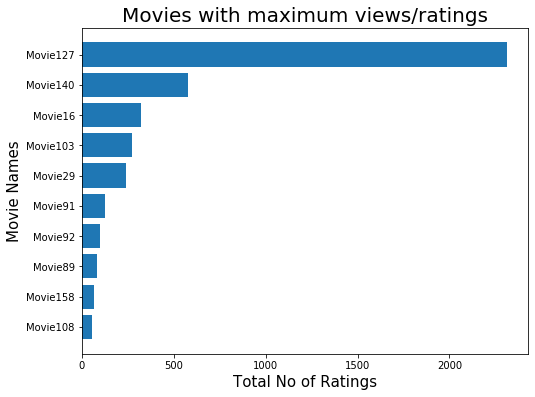

In [10]:
top10ViewedMovies = maxReview.head(10).sort_values(by='ViewCount',ascending=True)

#r1 = np.arange(len(top10ViewedMovies.ViewCount))
plt.figure(figsize=(8,6))
bar = plt.barh(top10ViewedMovies.index,top10ViewedMovies.ViewCount)
plt.xlabel("Total No of Ratings", fontdict = {'fontsize' : 15})
plt.ylabel("Movie Names", fontdict = {'fontsize' : 15})
plt.title("Movies with maximum views/ratings", fontdict = {'fontsize' : 20})

#rects = bar.patches
# for rect, label in zip(rects,maxReview.ViewCount):
#     height = rect.get_height()
#     plt.annotate('{}'.format(height),xy=(rect.get_y() + rect.get_width() / 2, height),
#                  xytext=(0, 3),  # 3 points vertical offset
#                  textcoords="offset points",
#                  ha='center', va='bottom')

In [11]:
maxReview.reset_index(inplace=True)
maxReview.rename(columns={'index':'Movies'}, inplace=True)
maxReview.head()

,Movies,ViewCount
0,Movie127,2313
1,Movie140,578
2,Movie16,320
3,Movie103,272
4,Movie29,243


### TASK 2: 
<p style="font-size:16px;">1. What is the average rating for each movie? <br>
    2. Define the top 5 movies with the maximum ratings.</p>

<p style="font-size:16px;background-color:Tomato"><b><i>Find the average rating for each movies</i></b></p>

In [12]:
averageRating = data.mean()
avgRating = pd.DataFrame(averageRating)
avgRating.reset_index(inplace=True)
avgRating.rename(columns={'index':'Movies',0:'AverageRating'}, inplace=True)
avgRating.head()

,Movies,AverageRating
0,Movie1,5.000000
1,Movie2,5.000000
2,Movie3,2.000000
3,Movie4,5.000000
4,Movie5,4.103448


In [13]:
newData = pd.merge(maxReview,avgRating, on='Movies')
newData.head()

,Movies,ViewCount,AverageRating
0,Movie127,2313,4.111976
1,Movie140,578,4.833910
2,Movie16,320,4.518750
3,Movie103,272,4.562500
4,Movie29,243,4.806584


<p style="font-size:16px;background-color:Tomato"><b><i>Define Top 5 movies with maximum ratings</i></b></p>

<p style="font-size:16px;">Create Dictionary with Movies and their total Ratings</p>

In [14]:
sumValues = {}
for column in data.columns:
    if column == 'user_id':
        continue
    else:
        sumValues[column] = data[column].sum()
    
list(sumValues.items())[:8]

[('Movie1', 5.0),
 ('Movie2', 5.0),
 ('Movie3', 2.0),
 ('Movie4', 10.0),
 ('Movie5', 119.0),
 ('Movie6', 4.0),
 ('Movie7', 5.0),
 ('Movie8', 5.0)]

In [15]:
sumRatings = pd.DataFrame(sumValues.items(), columns=['Movies','TotalRatings'])
sumRatings.head()

,Movies,TotalRatings
0,Movie1,5.0
1,Movie2,5.0
2,Movie3,2.0
3,Movie4,10.0
4,Movie5,119.0


<p style="font-size:16px;">Sort the values to find the movie with <b>maximum ratings</b> based on total ratings provided</p>

In [16]:
sumRatings.sort_values(by='TotalRatings', ascending=False, inplace=True)
sumRatings

,Movies,TotalRatings
126,Movie127,9511.0
139,Movie140,2794.0
15,Movie16,1446.0
102,Movie103,1241.0
28,Movie29,1168.0
...,...,...
153,Movie154,1.0
143,Movie144,1.0
68,Movie69,1.0
59,Movie60,1.0


In [17]:
finalData = pd.merge(newData,sumRatings, on='Movies')
finalData.head(10)

,Movies,ViewCount,AverageRating,TotalRatings
0,Movie127,2313,4.111976,9511.0
1,Movie140,578,4.833910,2794.0
2,Movie16,320,4.518750,1446.0
3,Movie103,272,4.562500,1241.0
4,Movie29,243,4.806584,1168.0
5,Movie91,128,4.578125,586.0
6,Movie92,101,4.772277,482.0
7,Movie89,83,4.578313,380.0
8,Movie158,66,4.818182,318.0
9,Movie108,54,4.666667,252.0


### TASK 3: Define the top 5 movies with the least audience.

In [18]:
leastWatchedMovie = finalData.sort_values(by='ViewCount', ascending=True).head(10)
leastWatchedMovie.head()

,Movies,ViewCount,AverageRating,TotalRatings
205,Movie100,1,4.0,4.0
140,Movie7,1,5.0,5.0
141,Movie8,1,5.0,5.0
142,Movie9,1,5.0,5.0
143,Movie10,1,5.0,5.0


Text(0.5, 1.0, 'Movies with least Audiance')

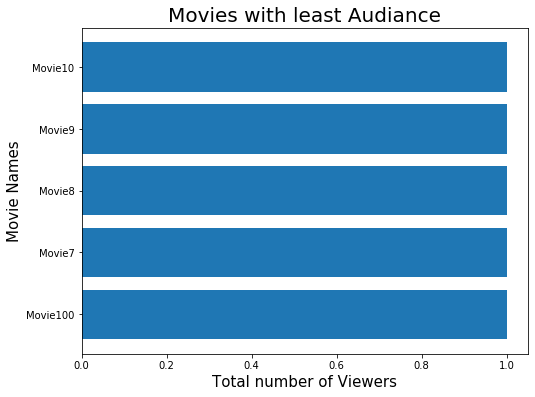

In [19]:
leastWatchedMovies = leastWatchedMovie.head(5)

#r1 = np.arange(len(top10ViewedMovies.ViewCount))
plt.figure(figsize=(8,6))
bar = plt.barh(leastWatchedMovies.Movies,leastWatchedMovies.ViewCount)
plt.xlabel("Total number of Viewers", fontdict = {'fontsize' : 15})
plt.ylabel("Movie Names", fontdict = {'fontsize' : 15})
plt.title("Movies with least Audiance", fontdict = {'fontsize' : 20})


## RECOMMENDATION SYSTEMS

#### Get the details about the rating of the movies and count of ratings for the movies

In [20]:
#We see data is in shape of a pivot. We unpivot it to organize by user and ratings
dataMelted=data.melt(id_vars='user_id', var_name='movie_id', value_name='ratings')
dataMelted.head()

,user_id,movie_id,ratings
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,NaN
2,A3LKP6WPMP9UKX,Movie1,NaN
3,AVIY68KEPQ5ZD,Movie1,NaN
4,A1CV1WROP5KTTW,Movie1,NaN


<p style="font-size:16px;">Check the Shape of Melted data</p>

In [21]:
print("Shape of data is: ", dataMelted.shape)
totalRecords = dataMelted.shape[0]

Shape of data is:  (998688, 3)


<p style="font-size:16px;">Find total number of of <b>Null Values</b> in Metled data </p>

In [22]:
dataMelted.isnull().sum()

user_id          0
movie_id         0
ratings     993688
dtype: int64

In [23]:
totalNull = dataMelted['ratings'].isnull().sum()
totalNull

993688

In [24]:
print("No of records that has non null values are: ", totalRecords-totalNull)

No of records that has non null values are:  5000


<p style="font-size:16px;">Total no of records that has rating is <b>5000</b></p>

In [25]:
dataMelted.describe()

,ratings
count,5000.000000
mean,4.385600
std,1.199667
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<p style="font-size:16px;">Verify the <b>Minimum</b> rating for the Movie and <b>Maximum</b> rating for the Movie</p>

In [26]:
print("Minimum rating given to a movie is: ", dataMelted.ratings.min())
print("Maximum rating given to a movie is: ", dataMelted.ratings.max())

Minimum rating given to a movie is:  1.0
Maximum rating given to a movie is:  5.0


In [27]:
ratingCounts = dataMelted.groupby('ratings')
ratingCounts = pd.DataFrame(ratingCounts.size())
ratingCounts

,0
ratings,
1.0,363
2.0,185
3.0,272
4.0,521
5.0,3659


<BarContainer object of 5 artists>

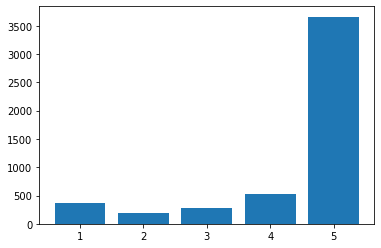

In [28]:
plt.bar(ratingCounts.index, ratingCounts[0])

<p style="font-size:16px;">Fill <b>NAN values</b> in the pivot table</p>

In [29]:
dataToPivot = data.iloc[:,1:]
dataToPivot.head()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Association Matrix (LearningMatrix)
learningMatrix = dataToPivot
learningMatrix.fillna(0,inplace=True)
learningMatrix.head()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p style="font-size:16px;color:red;"><b>Apply Cosine Similarity on Association</b></p>

In [31]:
movie_similarity = 1 - pairwise_distances(np.matrix(learningMatrix.values) , metric= cosine)
np.fill_diagonal(movie_similarity, 0)
ratings_matrix = pd.DataFrame(movie_similarity)
ratings_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,4838,4839,4840,4841,4842,4843,4844,4845,4846,4847
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p style="font-size:16px;color:red;"><b>Apply Hamming Similarity on Association</b></p>

In [33]:
movie_similarity_hamming = 1 - pairwise_distances(np.matrix(learningMatrix.values) , metric= hamming)
np.fill_diagonal(movie_similarity_hamming, 0)
ratings_matrix_hamming = pd.DataFrame(movie_similarity_hamming)
ratings_matrix_hamming.head()

,0,1,2,3,4,5,6,7,8,9,...,4838,4839,4840,4841,4842,4843,4844,4845,4846,4847
0,0.000000,0.985437,0.985437,0.985437,0.985437,0.985437,0.985437,0.985437,0.985437,0.985437,...,0.985437,0.985437,0.985437,0.985437,0.985437,0.985437,0.985437,0.985437,0.985437,0.985437
1,0.985437,0.000000,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,...,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291
2,0.985437,0.990291,0.000000,1.000000,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,...,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291
3,0.985437,0.990291,1.000000,0.000000,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,...,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291
4,0.985437,0.990291,0.990291,0.990291,0.000000,0.995146,1.000000,0.995146,1.000000,1.000000,...,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291


#### Verify Movie Similarity in Acsending order

In [34]:
try:
  userInput = input("Enter Movie Name: ")
  movieIndex = finalData[finalData['Movies'] == userInput].index.tolist()[0]
  finalData['Similarity'] = ratings_matrix_hamming.iloc[movieIndex]
  print("Recommended Top 10 Movies:\n\n ", finalData.sort_values(['Similarity'], ascending=True)[1:10])
except:
  print("Movie not found")

Enter Movie Name: Movie13
Recommended Top 10 Movies:

        Movies  ViewCount  AverageRating  TotalRatings  Similarity
0   Movie127       2313       4.111976        9511.0    0.985437
47  Movie188          6       5.000000          30.0    0.985437
46  Movie202          6       4.333333          26.0    0.985437
42  Movie190          7       4.714286          33.0    0.985437
27   Movie81         12       4.416667          53.0    0.990291
28  Movie117         11       4.727273          52.0    0.990291
29  Movie192         10       4.500000          45.0    0.990291
30  Movie186          9       5.000000          45.0    0.990291
31  Movie196          9       4.888889          44.0    0.990291


#### Verify Movie Similarity in Descendnig Order

In [36]:
try:
  userInput = input("Enter Movie Name: ")
  movieIndex = finalData[finalData['Movies'] == userInput].index.tolist()[0]
  finalData['Similarity'] = ratings_matrix_hamming.iloc[movieIndex]
  print("Recommended Top 10 Movies:\n\n ", finalData.sort_values(by ='Similarity', ascending=False)[1:10])
except:
  print("Movie not found")

Enter Movie Name: Movie13
Recommended Top 10 Movies:

         Movies  ViewCount  AverageRating  TotalRatings  Similarity
75   Movie120          3       5.000000          15.0         1.0
91   Movie148          2       5.000000          10.0         1.0
90    Movie30          2       4.500000           9.0         1.0
144   Movie14          1       4.000000           4.0         1.0
87   Movie132          3       5.000000          15.0         1.0
86   Movie129          3       4.000000          12.0         1.0
146   Movie15          1       5.000000           5.0         1.0
84   Movie137          3       4.000000          12.0         1.0
83   Movie201          3       4.333333          13.0         1.0


### TASK 4: Split Test and Train Data

In [40]:
newData = data.set_index('user_id')
newData.fillna(0,inplace= True)
newData.head()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
user_id,,,,,,,,,,,,,,,,,,,,,
A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVIY68KEPQ5ZD,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1IMQ9WMFYKWH5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
A1KLIKPUF5E88I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
A5HG6WFZLO10D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [41]:
train_data, test_data = train_test_split(newData, test_size = 0.2, random_state=0)
train_data.head()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
user_id,,,,,,,,,,,,,,,,,,,,,
A2MBVRE3SLHTYF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AFNEAHTMMMQM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A9GLPK2CWHXON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2FBJK2NDAD5M0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AHODVLFX12MY1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (3878, 206)
Shape of testing data:  (970, 206)


### TASK 5:  Build a recommendation model on training data

In [43]:
movie_similarity_train = 1 - pairwise_distances(np.matrix(train_data.values) , metric= hamming)
np.fill_diagonal(movie_similarity_train, 0)
ratings_matrix_train = pd.DataFrame(movie_similarity_train)
ratings_matrix_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3868,3869,3870,3871,3872,3873,3874,3875,3876,3877
0,0.000000,1.000000,0.990291,1.000000,0.990291,0.990291,0.990291,0.990291,1.000000,1.000000,...,0.995146,1.000000,0.990291,0.995146,0.990291,0.990291,1.000000,1.000000,1.000000,1.000000
1,1.000000,0.000000,0.990291,1.000000,0.990291,0.990291,0.990291,0.990291,1.000000,1.000000,...,0.995146,1.000000,0.990291,0.995146,0.990291,0.990291,1.000000,1.000000,1.000000,1.000000
2,0.990291,0.990291,0.000000,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,...,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291
3,1.000000,1.000000,0.990291,0.000000,0.990291,0.990291,0.990291,0.990291,1.000000,1.000000,...,0.995146,1.000000,0.990291,0.995146,0.990291,0.990291,1.000000,1.000000,1.000000,1.000000
4,0.990291,0.990291,0.990291,0.990291,0.000000,0.990291,0.990291,0.990291,0.990291,0.990291,...,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291,0.990291


In [44]:
test_data.head()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
user_id,,,,,,,,,,,,,,,,,,,,,
A1BNHMIPVZN99Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A227OFLP2HZD24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A161G8OUSE9DPX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A109E2DGQAM2O2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A21LFSJSUSLKY7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
try:
  userInput = input("Enter Movie Name: ")
  movieIndex = finalData[finalData['Movies'] == userInput].index.tolist()[0]
  finalData['Similarity'] = ratings_matrix_train.iloc[movieIndex]
  print("Recommended Top 10 Movies:\n\n ", finalData.sort_values(['Similarity'], ascending=True)[1:10])
except:
  print("Movie not found")

Enter Movie Name: Movie3
Recommended Top 10 Movies:

         Movies  ViewCount  AverageRating  TotalRatings  Similarity
37   Movie114          7       4.428571          31.0    0.985437
152  Movie187          1       5.000000           5.0    0.985437
149   Movie18          1       5.000000           5.0    0.990291
131  Movie177          1       5.000000           5.0    0.990291
132   Movie21          1       5.000000           5.0    0.990291
133  Movie180          1       5.000000           5.0    0.990291
134   Movie13          1       5.000000           5.0    0.990291
135    Movie1          1       5.000000           5.0    0.990291
136    Movie2          1       5.000000           5.0    0.990291
